<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods for classification
We will restrict our discussion to classification tasks, tough the same principles can be extended to  regression tasks too.

In ensemble methods, instead of relying on one particular classifier, we will train an ensemble of classifiers, and combine the results of the individual classifiers to obtain the final classifier. In ensemble methods, we rely on the assumption that the individual classifiers are not overly correlated and that when we combine the results, the uncertainties average out and that the combined result is closer to the optimal than that of a single classifier. 

## Bagging

As mentioned above, the key to the success of the ensemble method lies in the assumption that the results of the individual classifiers are not overly correlated with each other. One method to reduce correlation between classifiers is to use different training samples for different classifiers. Though one would think of using random mutually exclusive partitions, such a scheme will reduce the number of samples available for each classifier. An alternative approach that is mostly used is bootstrap aggregation (also known in short as bagging).

Let $N$ be the total number of training samples available. In standard bagging each sample size is of size $N$, with samples selected from the original set with replacement. One could also work with sample sizes lesser than the original size.

## Ensemble of decision trees

We will implement an ensemble of decision tree classifiers and compare its performance with that of a single classifier.

We will use the banana dataset.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

--2019-07-18 09:01:24--  https://www.openml.org/data/download/1586217/phpwRjVjk
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75142 (73K) [text/plain]
Saving to: ‘phpwRjVjk’

phpwRjVjk           100%[===================>]  73.38K   269KB/s    in 0.3s    

2019-07-18 09:01:25 (269 KB/s) - ‘phpwRjVjk’ saved [75142/75142]



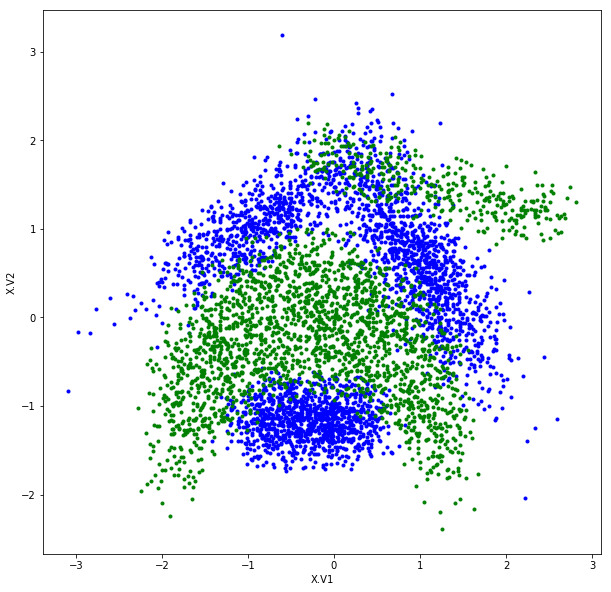

In [5]:
! rm -rf phpwRjVjk
! wget 'https://www.openml.org/data/download/1586217/phpwRjVjk'
# Load the dataset as a pandas dataframe
from scipy.io import arff
import pandas as pd

data = arff.loadarff('phpwRjVjk')
df = pd.DataFrame(data[0])
df['Class'] = df['Class'].replace(to_replace={b'1':1,b'2':2})
plt.figure(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
plt.xlabel('X.V1')
plt.ylabel('X.V2')
x_data = df[['V1','V2']].values
y_data = df[['Class']].values

### Implement a single decision tree classifier


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6)
clf = clf.fit(x_data, y_data)

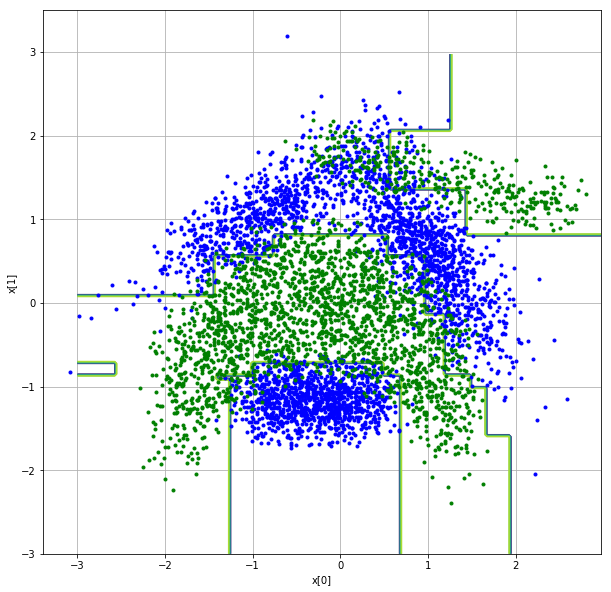

In [83]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### Ensemble of decision trees

In [84]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=6),n_estimators=100,max_samples = 100,bootstrap=True,n_jobs=-1)
bag_clf.fit(x_data,y_data)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=6,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

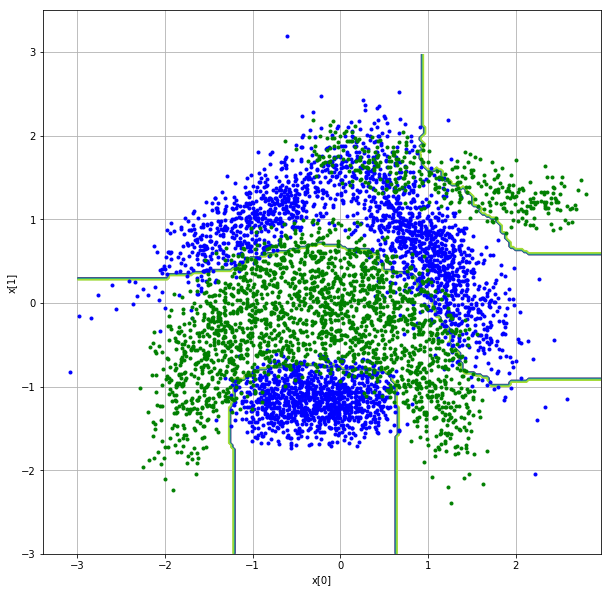

In [85]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

## Random Forest Classifier

A random forest classifier is a decision tree classifier with bagging, which in addition to using an ensemble of decision trees, also uses a random subset of the features at each splitting stage of a decision tree. This further helps to reduce the correlation between the individual trees. 

In [86]:
from sklearn.ensemble import RandomForestClassifier
rndf_clf = RandomForestClassifier(criterion='entropy',max_depth=6,n_estimators=100,bootstrap=True,n_jobs=-1)
rndf_clf.fit(x_data,y_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

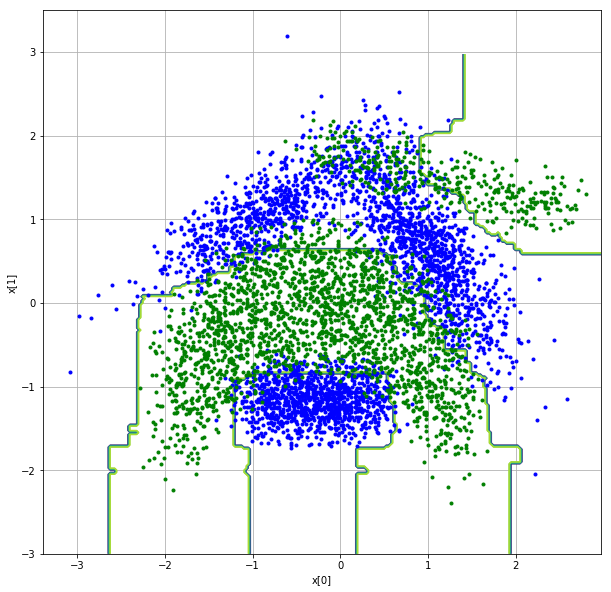

In [88]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = rndf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

## Boosting

Boosting is an ensemble method where the classifiers are trained sequentially, such that every subsequent classifier gives more weightage to samples which were mis-classified in the previous stage. Given that the samples which were mis-classified are given more weightage, the subsequent classifier has a tendency to correct the misclassifications.

### Adaboost Classifier

We will implement an Adaboost classifier, with the base classifier being a decision tree calssifier.


In [103]:
from sklearn.ensemble import AdaBoostClassifier
adab_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=6), n_estimators=10)
adab_clf.fit(x_data,y_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

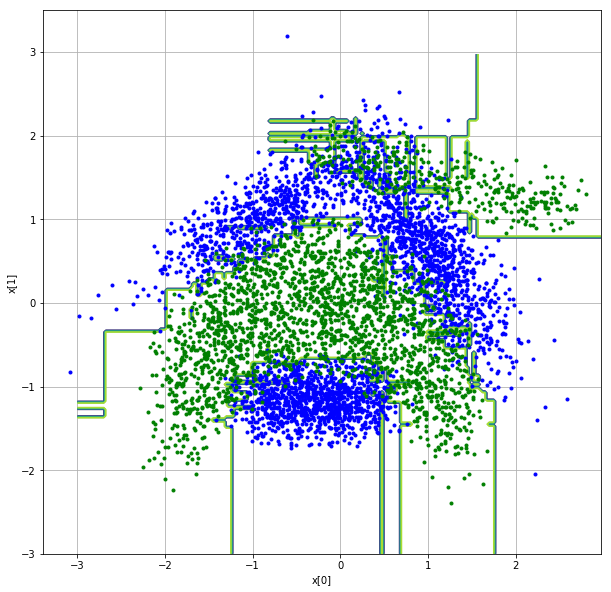

In [104]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = adab_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

We can see that the AdaBoost classifier is overfitting the data even with 10 estimators.